In [28]:
library(dplyr)
library(forcats)
library(ggplot2)
library(reshape2)

In [15]:
read_idx_mapped_reads_per_kb <- \(filename) {
  results <- processx::run(
    "samtools", c("idxstats", filename)
  )
  tbl <- read.table(textConnection(results$stdout))
  tbl %>%
    mutate(
      group = V1 %>%
        fct_relabel(\(n) n %>% replace(!grepl("^(2L|2R|3L|3R|4|X|Y)$", n), "scaffolds")) %>%
        fct_relevel("scaffolds", after = 7L)
    ) %>%
    group_by(group) %>%
    summarise(reads_per_kb = sum(V3) / sum(V2) * 1000) %>%
    pull(reads_per_kb, group)
}

In [21]:
nos_stats <- cbind(
  E = rowMeans(
    cbind(
      read_idx_mapped_reads_per_kb("bam/nos_E2.bam"),
      read_idx_mapped_reads_per_kb("bam/nos_E4.bam")
    )
  ),
  EM = rowMeans(
    cbind(
      read_idx_mapped_reads_per_kb("bam/nos_G2.bam"),
      read_idx_mapped_reads_per_kb("bam/nos_G4.bam")
    )
  ),
  ML = rowMeans(
    cbind(
      read_idx_mapped_reads_per_kb("bam/nos_J2.bam"),
      read_idx_mapped_reads_per_kb("bam/nos_J4.bam")
    )
  ),
  L = rowMeans(
    cbind(
      read_idx_mapped_reads_per_kb("bam/nos_L2.bam"),
      read_idx_mapped_reads_per_kb("bam/nos_L4.bam")
    )
  )
)
nos_stats

,E,EM,ML,L
2L,39.964596,19.146913,7.4060829,8.904528
2R,40.675213,18.236848,6.5376841,8.054475
3L,38.190282,18.602322,7.0703627,8.454930
3R,40.079483,18.949709,7.2747153,8.890101
4,75.313898,14.638043,4.6690566,6.497885
X,26.470046,9.766963,3.6036243,4.714711
Y,2.325656,1.713225,0.9877699,1.724269
scaffolds,6.083805,3.401239,1.8920234,4.004100


In [20]:
tj_stats <- cbind(
  E = rowMeans(
    cbind(
      read_idx_mapped_reads_per_kb("bam/tj_E1.bam"),
      read_idx_mapped_reads_per_kb("bam/tj_E2.bam")
    )
  ),
  EM = read_idx_mapped_reads_per_kb("bam/tj_G2.bam"),
  ML = read_idx_mapped_reads_per_kb("bam/tj_J2.bam"),
  L = rowMeans(
    cbind(
      read_idx_mapped_reads_per_kb("bam/tj_L1.bam"),
      read_idx_mapped_reads_per_kb("bam/tj_L2.bam")
    )
  )
)
tj_stats

,E,EM,ML,L
2L,25.643739,15.649635,41.788681,46.500761
2R,24.969929,14.302563,39.635802,40.221026
3L,24.826000,15.041963,37.356546,41.826948
3R,24.928824,15.601822,39.794814,45.526401
4,29.547574,13.546161,47.445686,37.852405
X,15.297122,8.490812,19.498459,20.047662
Y,1.541848,1.933002,1.451729,2.664729
scaffolds,3.228126,3.880679,2.980394,5.827008


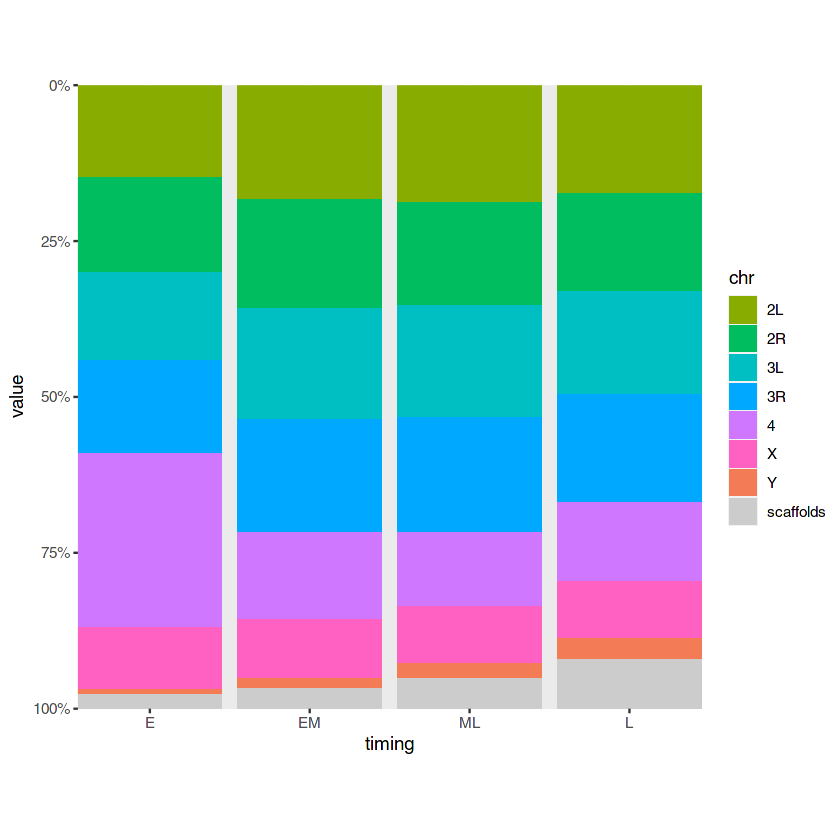

In [31]:
melt(nos_stats, varnames = c("chr", "timing")) %>%
  mutate(chr = chr %>% fct_rev()) %>%
  ggplot(aes(timing, value, fill=chr)) +
          geom_bar(position="fill", stat="identity") +
          scale_y_reverse(labels = scales::percent) +
          scale_fill_manual(
            values = c(hcl(seq(0, 330, length.out=8)[-8] + 100, 100, 65), "#cccccc") %>%
              rev(),
            breaks = rev
          ) +
          coord_cartesian(expand=F) +
          theme(
            aspect.ratio = 1,
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank()
          )

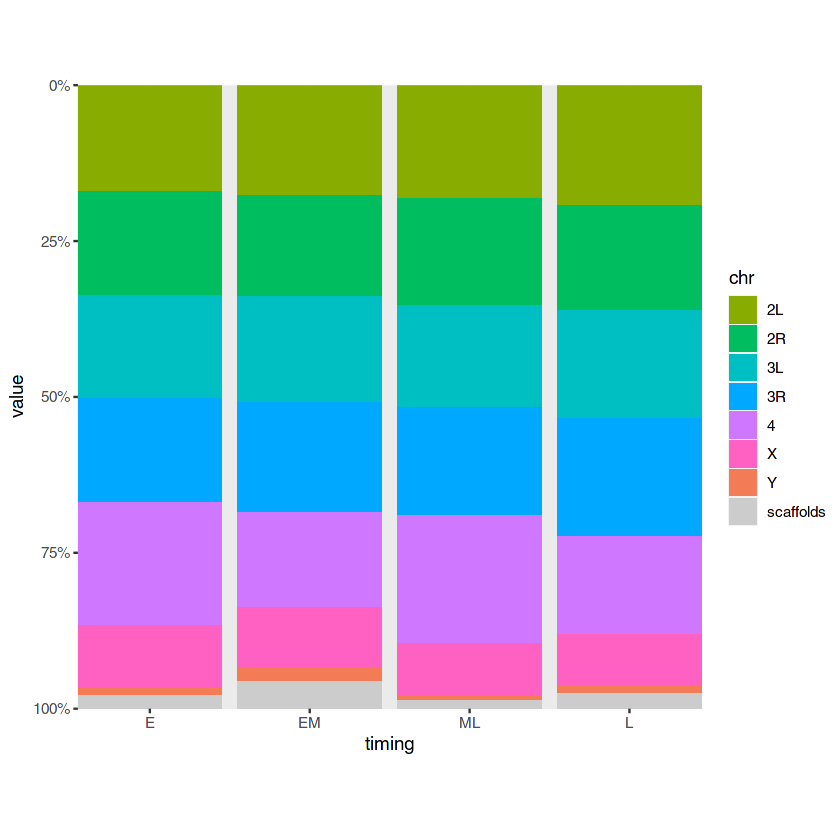

In [32]:
melt(tj_stats, varnames = c("chr", "timing")) %>%
  mutate(chr = chr %>% fct_rev()) %>%
  ggplot(aes(timing, value, fill=chr)) +
          geom_bar(position="fill", stat="identity") +
          scale_y_reverse(labels = scales::percent) +
          scale_fill_manual(
            values = c(hcl(seq(0, 330, length.out=8)[-8] + 100, 100, 65), "#cccccc") %>%
              rev(),
            breaks = rev
          ) +
          coord_cartesian(expand=F) +
          theme(
            aspect.ratio = 1,
            panel.grid.major.y = element_blank(),
            panel.grid.minor.y = element_blank()
          )